### 1. Descriptive Statistics
#### Iris Dataset:    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

##### a. Compute the mean, median, and standard deviation for all numerical features.

In [6]:
#Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
print(df.head())
# Calculate mean, median, and standard deviation
mean_values = df.mean()
median_values = df.median()
std_dev_values = df.std()

# Display results
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard Deviation values:\n", std_dev_values)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Mean values:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median values:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standard Deviation values:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


 ##### b. Create histograms and boxplots for feature distributions.

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

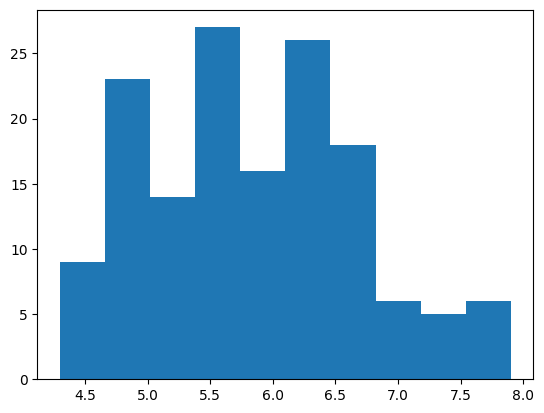

In [7]:
# Histogarm representation of data
plt.hist(df['sepal length (cm)'])

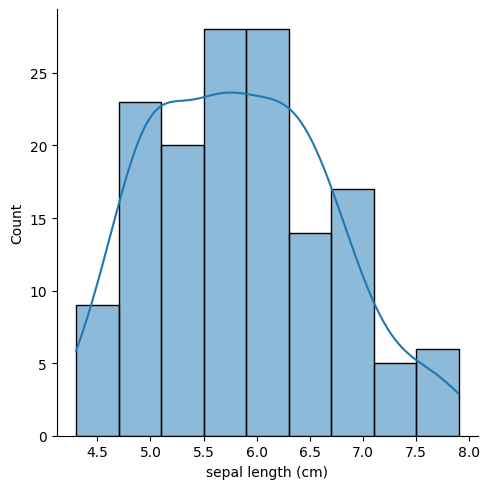

In [11]:
# Distribution with KDE
sns.displot(df['sepal length (cm)'], kind="hist", kde=True)

<Axes: ylabel='sepal length (cm)'>

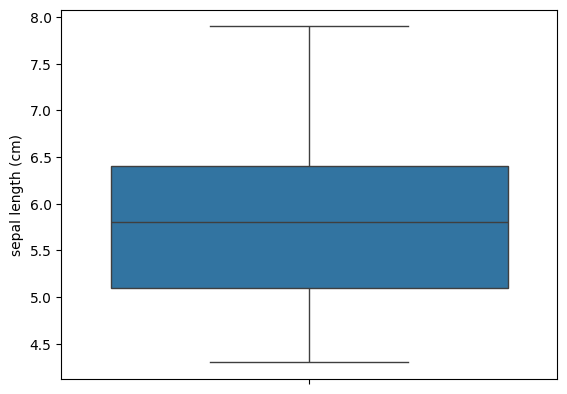

In [19]:
# Box plot
sns.boxplot(df['sepal length (cm)'])

##### c. Calculate the correlation matrix for the features.

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


##### d. Interpret which features are most correlated with each other.

Values near 1 and -1 : High correlation and value 0: No correlation
Petal length and Petal width: Very high positive correlation. Petal with more length tend to have more width too. 

Sepal length and Petal length: Has high positive correlation. Longer sepals are tend to have longer petals.

Sepal length and Petal width: Highr positive correlation. Longer sepal are associated with wide petals. 

Sepal width: This feature shows weaker correlations with other features. It has lesser correlation with petal length and petal width.

### 2. Conditional Probability
#### Given the following table of events, compute P(A∣B) and P(B∣A).
#### |    -    |    B     |    not B  |
#### |    A    |    30    |     20    |
#### |  not A  |    50    |     100   |

In [16]:
# Event A only:20
# Event B only:50
# Event A ∩ B:30
# Total sample_space:20+50+30+100=200
# Print the events
print("Event A only:", 20)
print("Event B only:", 50)
print("Event A ∩ B:", 30)

# Calculate P(A ∩ B) and P(B)
P_A_and_B = 30/200
P_B = (50+30)/200
P_A = (20+30)/200

# Conditional Probability P(A|B)
P_A_given_B = P_A_and_B / P_B

# Conditional Probability P(B|A)
P_B_given_A = P_A_and_B / P_A

# Print the result
print(f"Conditional Probability P(A|B) = {P_A_given_B:.2f}")
print(f"Conditional Probability P(B|A) = {P_B_given_A:.2f}")

Event A only: 20
Event B only: 50
Event A ∩ B: 30
Conditional Probability P(A|B) = 0.37
Conditional Probability P(B|A) = 0.60


### 3. Bayes' Theorem

A model classifies spam emails with the following probabilities:
P(Spam)=0.2
P(Not Spam)=0.8
P(Keyword | Spam)=0.7
P(Keyword | Not Spam)=0.1
Compute the probability that an email is spam given that it contains the keyword.

In [8]:
# Given probabilities
P_Spam = 0.2
P_Not_Spam = 0.8
P_keyword_given_Spam = 0.7
P_keyword_given_Not_Spam = 0.1
# Calculate P(keyword)
P_keyword= (P_keyword_given_Spam*P_Spam) + (P_keyword_given_Not_Spam*P_Not_Spam)

# Calculate P(Spam|keyword)
P_Spam_given_keyword = (P_keyword_given_Spam * P_Spam)/ P_keyword

print(f"P(Spam|keyword): {P_Spam_given_keyword:.4f}")

P(Spam|keyword): 0.6364


### 4. Outlier Detection, Removal, and Feature Scaling

Choose a dataset on your own and perform the following operation
Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.
Calculate the IQR (IQR=Q3−Q1).
Define outliers as values outside the range [Q1−1.5*IQR,Q3+1.5*IQR].
Create a function to detect and remove outliers for all numerical features.
Plot boxplots of features before and after outlier removal.  
Plot histograms of a few features before and after applying normalization and standardization.

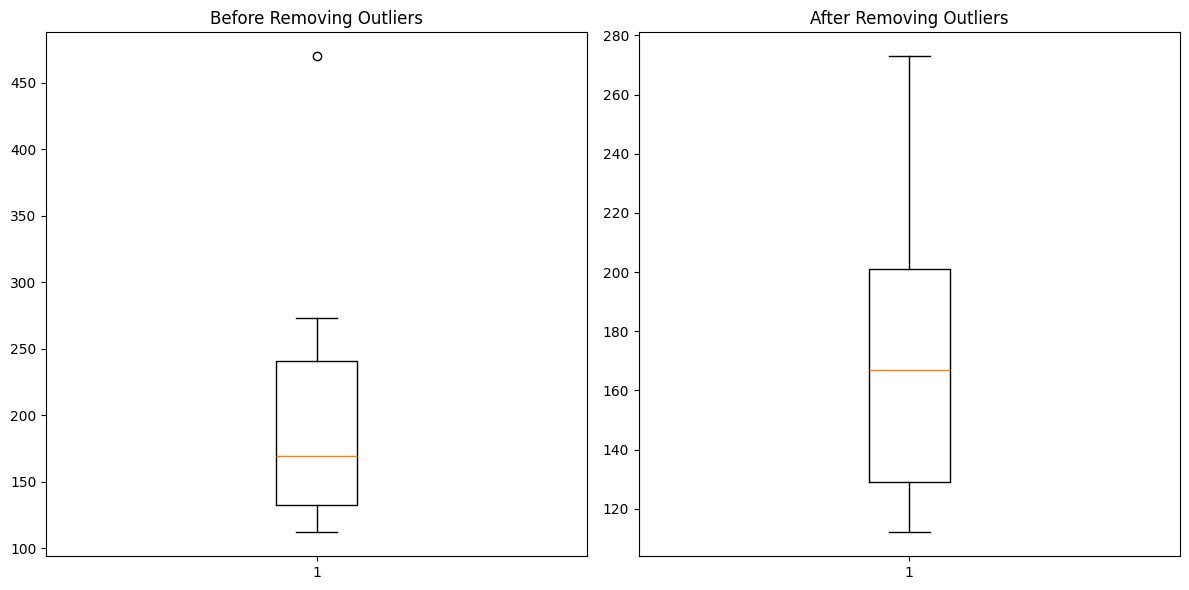

In [37]:
# Given dataset
Runs= [112,121,167,172,137,273,470,230]

# Step 1: Calculate Q1, Q3, and IQR
Q1 = np.percentile(Runs, 25)
Q3 = np.percentile(Runs, 75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
filtered_Runs= [x for x in Runs if lower_bound <= x <= upper_bound]

# Plotting before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(Runs)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered_Runs)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

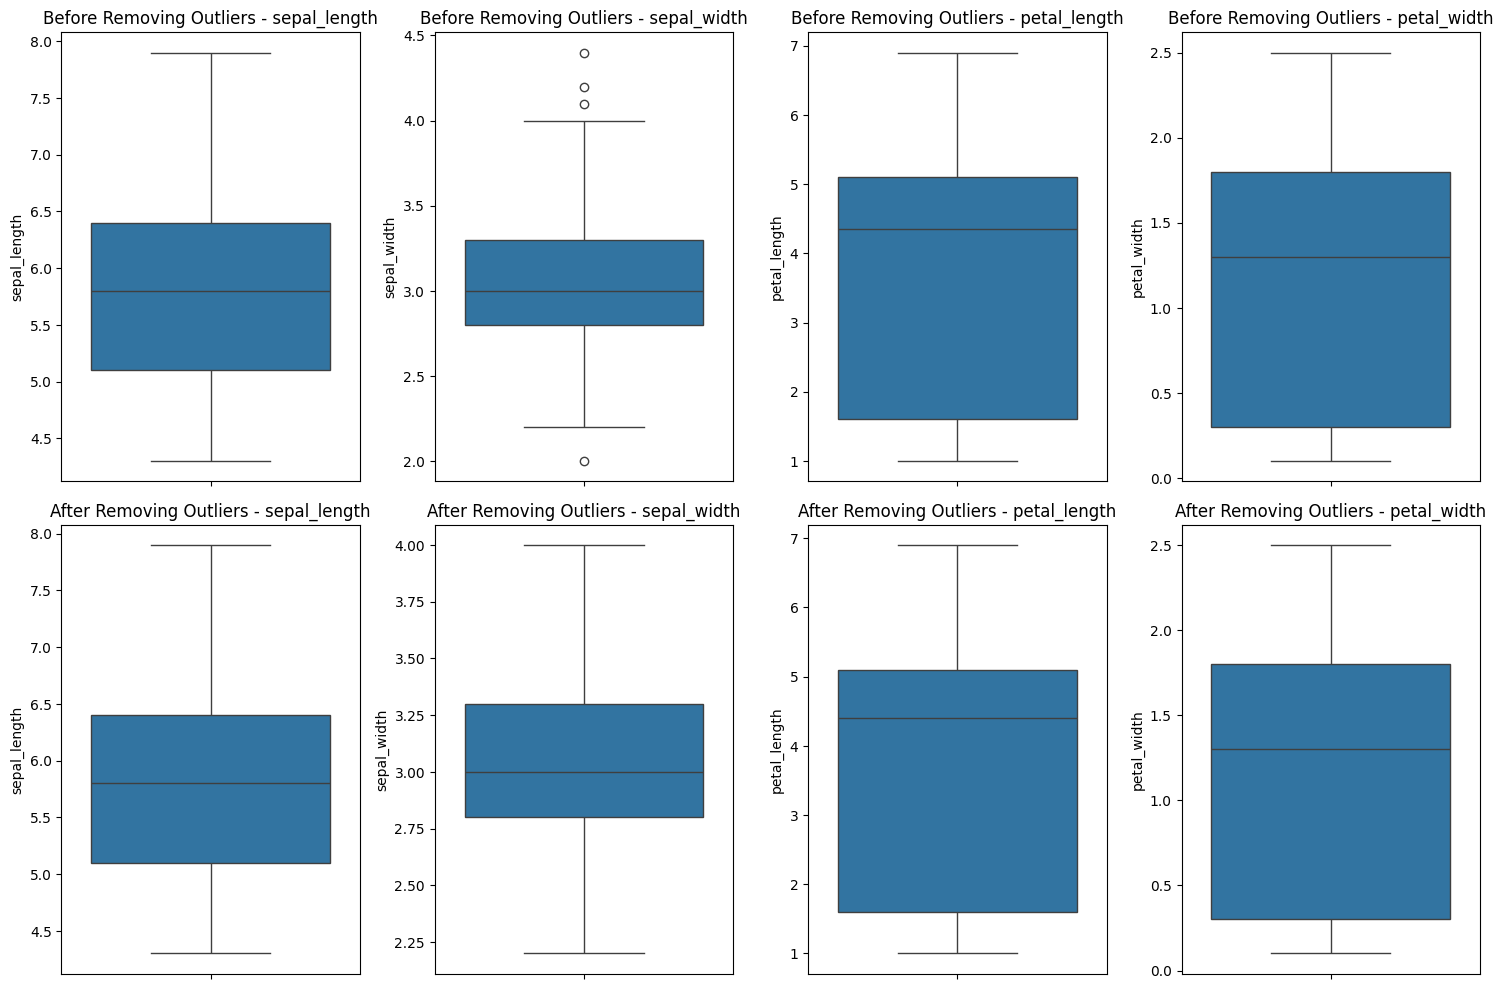

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
iris = pd.read_csv("./iris.csv")

# Filter numeric columns
numeric_columns = iris.select_dtypes(include=np.number).columns

# Placeholder for filtered data
filtered_iris = iris.copy()

for column in numeric_columns:
    # Step 1: Calculate Q1, Q3, and IQR
    Q1 = np.percentile(iris[column], 25)
    Q3 = np.percentile(iris[column], 75)
    IQR = Q3 - Q1

    # Step 2: Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Remove outliers
    filtered_iris = filtered_iris[(filtered_iris[column] >= lower_bound) & (filtered_iris[column] <= upper_bound)]

# Plotting before and after removing outliers
fig, axes = plt.subplots(2, len(numeric_columns), figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    # Before removing outliers
    sns.boxplot(data=iris, y=column, ax=axes[0, i])
    axes[0, i].set_title(f"Before Removing Outliers - {column}")

    # After removing outliers
    sns.boxplot(data=filtered_iris, y=column, ax=axes[1, i])
    axes[1, i].set_title(f"After Removing Outliers - {column}")

plt.tight_layout()
plt.show()

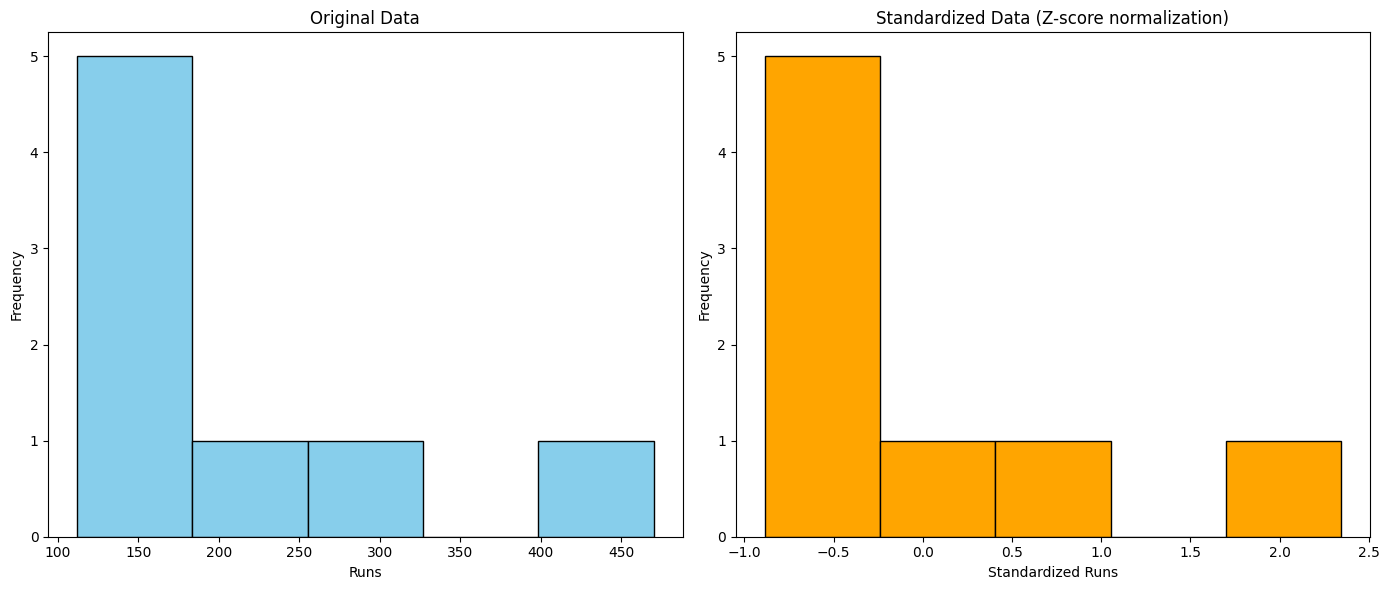

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Given Runs data
runs = np.array([112, 121, 167, 172, 137, 273, 470, 230]).reshape(-1, 1)

# Apply Standardization (Z-score normalization)
scaler = StandardScaler()
runs_std = scaler.fit_transform(runs)

# Plot histograms
plt.figure(figsize=(14, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.hist(runs, bins=5, color='skyblue', edgecolor='black')
plt.title('Original Data')
plt.xlabel('Runs')
plt.ylabel('Frequency')

# Standardized Data
plt.subplot(1, 2, 2)
plt.hist(runs_std, bins=5, color='orange', edgecolor='black')
plt.title('Standardized Data (Z-score normalization)')
plt.xlabel('Standardized Runs')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()